# Решение проблемы MNIST

Целью данного проекта является простое решение проблемы MNIST датасета. Модель нейронной сети, которая здесь используется не является сложной, но достигает высоких значений метрик. 

In [ ]:
import tensorflow as tf

In [6]:
import matplotlib.pyplot as plt

In [47]:
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist #общеизвестный датасет с цифрами от руки 

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

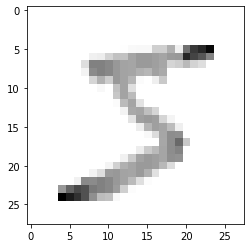

In [16]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

Нормализируем данные:

In [15]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_train, axis=1)

Создадим модель:

In [17]:
model = tf.keras.models.Sequential() #инициализируем модель. Всего есть два типа моделей 

Добавим слои в модель и инициализируем их:

In [35]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #Слой input, который получает на вход данные 
                                    #и также изменяет данные из 2D в 1D измерение
                                     #А также последний слой в сверточной нейронной сети должен получать
                                    # на вход "плоские данные"
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #добавляем скрытый слой с 128 нейронами
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #добавляем скрытый слой с 128 нейронами
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #добавляем скрытый слой с 128 нейронами

Установим гиперпараметры

- categorical_crossentropy (cce) produces a one-hot array containing the probable match for each category,
- sparse_categorical_crossentropy (scce) produces a category index of the most likely matching category.

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [37]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1456 - accuracy: 0.9741
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9819
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9840


Проверим на валидацию:

In [40]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2754 - accuracy: 0.9674


Сохраним модель

In [43]:
#model.save('eipc_num_reader.model') 

INFO:tensorflow:Assets written to: eipc_num_reader.model\assets


Можем загрузить её:

In [44]:
#new_model = tf.keras.models.load_model('eipc_num_reader.model')

Если нужно посмотреть на предсказания:

In [45]:
predictions = model.predict([x_test]) #данные всегда передаются в качестве list

313/313 [==============================] - 0s 1ms/step


In [46]:
predictions #получили one-hot-encoded array

array([[1.69748546e-05, 6.16239849e-05, 1.53803587e-04, ...,
        9.99262631e-01, 8.43448652e-05, 2.07591773e-04],
       [3.71078640e-05, 5.92446122e-05, 9.98470962e-01, ...,
        6.92880189e-04, 2.06098091e-04, 6.53038023e-06],
       [1.23727077e-05, 9.97653663e-01, 7.90887687e-04, ...,
        4.52219974e-04, 6.45230117e-04, 6.47805209e-05],
       ...,
       [1.50747637e-05, 5.22208247e-05, 1.98266222e-04, ...,
        2.63625465e-04, 1.34932736e-04, 6.68536231e-04],
       [5.99125706e-05, 2.36049509e-05, 3.67797838e-05, ...,
        1.25686129e-05, 2.74102465e-04, 1.87972575e-04],
       [4.42303281e-05, 9.09844748e-05, 5.10547034e-05, ...,
        1.00224615e-05, 1.78364207e-04, 7.92202536e-06]], dtype=float32)

In [49]:
print(np.argmax(predictions[0])) #индекс самого большого элемента в array

7


Проверим

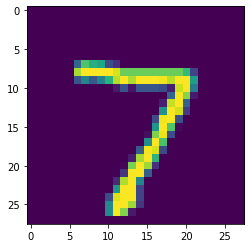

In [50]:
plt.imshow(x_test[0])
plt.show()